In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from config_algorithms import ACOConfig
from oqat import OQATClassifier, OQATModel
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
#  plot confusion matrices
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
SEED = 42

def pretty_print_confusion_matrix(confusion_matrix):
    for row in confusion_matrix:
        print(row)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    # print(cm)

    df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True, cmap=cmap)

    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



In [3]:
# Load iris dataset from sklearn
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Define the feature type for each column (discrete or continuous)
column_names = ["a1", "a2", "a3", "a4"]
column_types = ["num", "num", "num", "num"]

print(X.shape)
print(y.shape)

(150, 4)
(150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [5]:
# Balance the training set

print("Before SMOTE")
print(pd.Series(y_train).value_counts())
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)
# print("After SMOTE")
# print(pd.Series(y_train).value_counts())

Before SMOTE
1    41
0    40
2    39
dtype: int64


Decision Tree
[10  0  0]
[0 9 0]
[ 0  0 11]
Score:  1.0


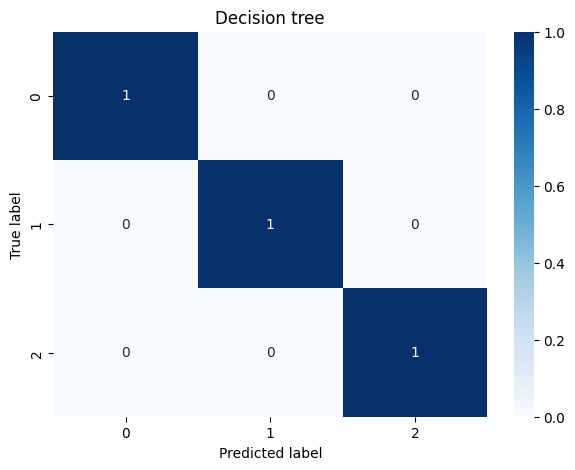

In [6]:
# Run a classification tree algorithm from sklearn
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Decision Tree")
pretty_print_confusion_matrix(cm_tree)
print("Score: ", tree_model.score(X_test, y_test))
plot_confusion_matrix(cm_tree, classes=['0', '1', '2'], normalize=True, title='Decision tree')
# text_repr = tree.export_text(tree_model)
# print(text_repr)

In [8]:
# # Run the OQAT algorithm
aco_config = ACOConfig(algorithm="vertex-ac", cycles=20, ants=10, alpha=1, rho=0.99, tau_max=6., tau_min=0.01)
classifier = OQATClassifier(collision_strategy="best_score", null_strategy="weighted", heuristic="aco", heuristic_config=aco_config)
classifier.fit(X_train, y_train, column_names, column_types, n_discrete_bins=3)
print(classifier.model)

[[a4=0.00], [a3=0.00]] a1 []
[[a4=0.00], [a3=0.00]] a2 []
[[a4=0.00], [a3=0.00]] a3 [0.0]
bins [0.0]
bins [[0]]
a3 [[0]] [1.1        2.82448718 4.85508242 6.7       ] inf -inf
left 0 right 0
[[a4=0.00], [a3=0.00]] a4 [0.0]
bins [0.0]
bins [[0]]
a4 [[0]] [0.1        0.78190476 1.68241758 2.5       ] inf -inf
left 0 right 0
Model for class 0 created
Score: 1.0
[[a3=1.00], [a1=2.00]] a1 [2.0]
bins [2.0]
bins [[2]]
a1 [[2]] [4.3        5.5491342  6.55047348 7.7       ] inf -inf
left 2 right 2
[[a3=1.00], [a1=2.00]] a2 []
[[a3=1.00], [a1=2.00]] a3 [1.0]
bins [1.0]
bins [[1]]
a3 [[1]] [1.1        2.82448718 4.85508242 6.7       ] inf -inf
left 1 right 1
[[a3=1.00], [a1=2.00]] a4 []
[[a2=1.00], [a4=1.00]] a1 []
[[a2=1.00], [a4=1.00]] a2 [1.0]
bins [1.0]
bins [[1]]
a2 [[1]] [2.         2.88043478 3.50927536 4.4       ] inf -inf
left 1 right 1
[[a2=1.00], [a4=1.00]] a3 []
[[a2=1.00], [a4=1.00]] a4 [1.0]
bins [1.0]
bins [[1]]
a4 [[1]] [0.1        0.78190476 1.68241758 2.5       ] inf -inf
left 1

In [9]:
classifier.collision_strategy = "None"
classifier.null_strategy = "None"
y_pred_set = classifier.predict(X_test, column_names)
print(y_pred_set)

[1, 0, 2, 1, 1, 0, 1, -1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, -1, 2, -1, 0, 0]


[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]
Score:  1.0


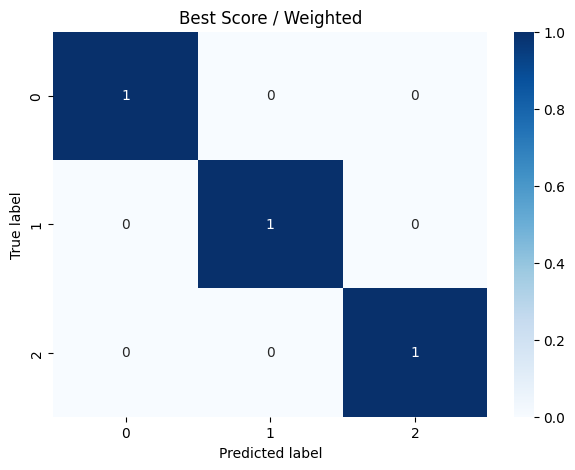

In [10]:
classifier.collision_strategy = "best_score"
classifier.null_strategy = "weighted"
y_pred_bs_w = classifier.predict(X_test, column_names)
print(y_pred_bs_w)
cm_bs_w = classifier.confusion_matrix(y_pred_bs_w, y_test)
pretty_print_confusion_matrix(cm_bs_w)
print("Score: ", classifier.score(y_pred_bs_w, y_test))
plot_confusion_matrix(np.array(cm_bs_w), classes=['0', '1', '2'], normalize=True, title='Best Score / Weighted')

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]
Score:  1.0


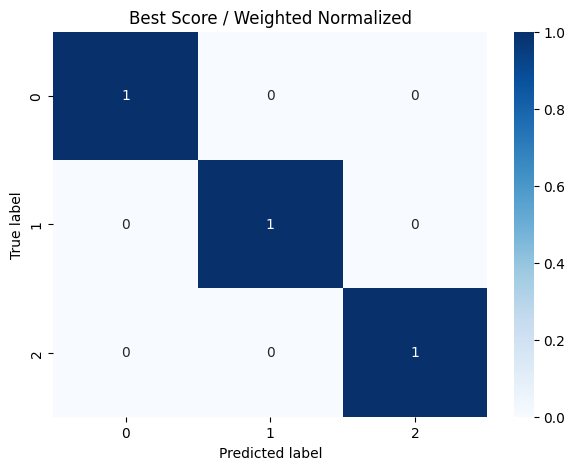

In [11]:
classifier.collision_strategy = "best_score"
classifier.null_strategy = "weighted_normalized"
y_pred_bs_wn = classifier.predict(X_test, column_names)
print(y_pred_bs_wn)
cm_bs_wn = classifier.confusion_matrix(y_pred_bs_wn, y_test)
pretty_print_confusion_matrix(cm_bs_wn)
print("Score: ", classifier.score(y_pred_bs_wn, y_test))
plot_confusion_matrix(np.array(cm_bs_wn), classes=['0', '1', '2'], normalize=True, title='Best Score / Weighted Normalized')

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]
Score:  1.0


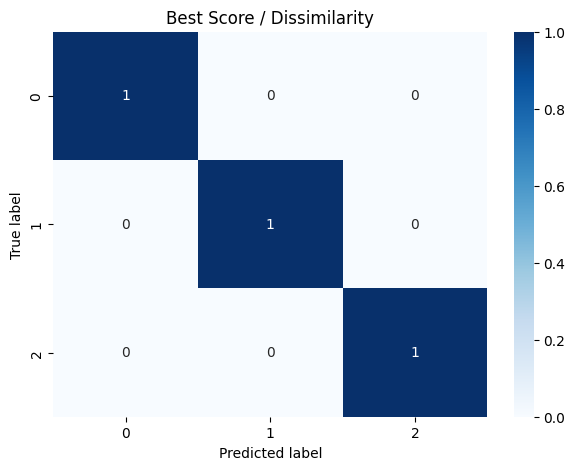

In [12]:
classifier.collision_strategy = "best_score"
classifier.null_strategy = "dissimilarity"
y_pred_bs_d = classifier.predict(X_test, column_names)
print(y_pred_bs_d)
cm_bs_d = classifier.confusion_matrix(y_pred_bs_d, y_test)
pretty_print_confusion_matrix(cm_bs_d)
print("Score: ", classifier.score(y_pred_bs_d, y_test))
plot_confusion_matrix(np.array(cm_bs_d), classes=['0', '1', '2'], normalize=True, title='Best Score / Dissimilarity')

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]
Score:  1.0


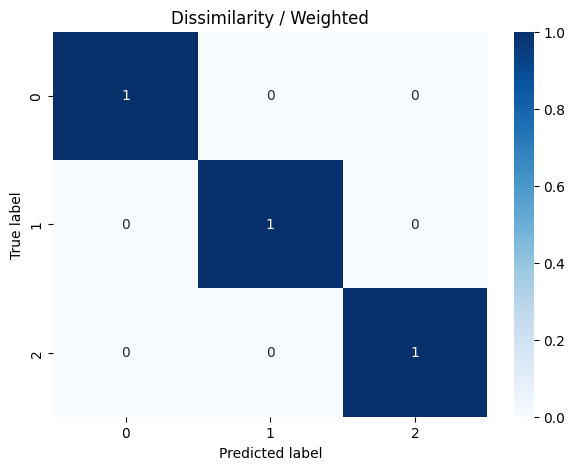

In [13]:
classifier.collision_strategy = "dissimilarity"
classifier.null_strategy = "weighted"
y_pred_d_w = classifier.predict(X_test, column_names)
print(y_pred_d_w)
cm_d_w = classifier.confusion_matrix(y_pred_d_w, y_test)
pretty_print_confusion_matrix(cm_d_w)
print("Score: ", classifier.score(y_pred_d_w, y_test))
plot_confusion_matrix(np.array(cm_d_w), classes=['0', '1', '2'], normalize=True, title='Dissimilarity / Weighted')

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]
Score:  1.0


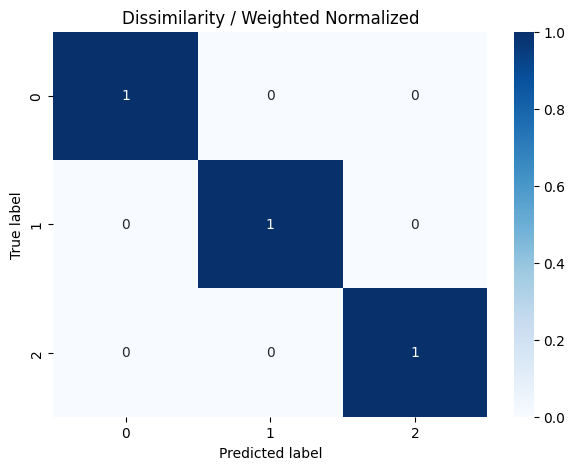

In [14]:
classifier.collision_strategy = "dissimilarity"
classifier.null_strategy = "weighted_normalized"
y_pred_d_wn = classifier.predict(X_test, column_names)
print(y_pred_d_wn)
cm_d_wn = classifier.confusion_matrix(y_pred_d_wn, y_test)
pretty_print_confusion_matrix(cm_d_wn)
print("Score: ", classifier.score(y_pred_d_wn, y_test))
plot_confusion_matrix(np.array(cm_d_wn), classes=['0', '1', '2'], normalize=True, title='Dissimilarity / Weighted Normalized')

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0]
[10, 0, 0]
[0, 9, 0]
[0, 0, 11]
Score:  1.0


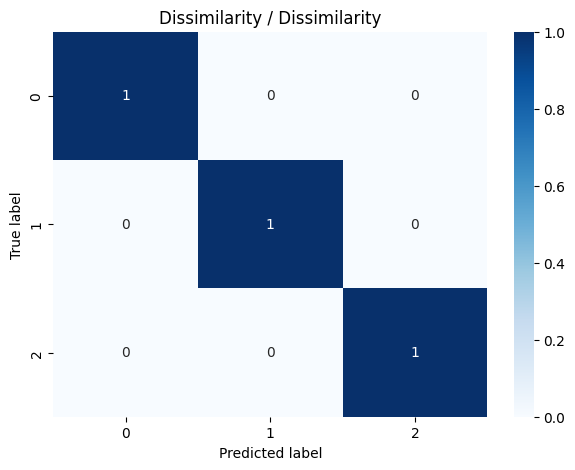

In [15]:
classifier.collision_strategy = "dissimilarity"
classifier.null_strategy = "dissimilarity"
y_pred_d_d = classifier.predict(X_test, column_names)
print(y_pred_d_d)
cm_d_d = classifier.confusion_matrix(y_pred_d_d, y_test)
pretty_print_confusion_matrix(cm_d_d)
print("Score: ", classifier.score(y_pred_bs_d, y_test))
plot_confusion_matrix(np.array(cm_d_d), classes=['0', '1', '2'], normalize=True, title='Dissimilarity / Dissimilarity')

In [16]:

for learning_class, model in classifier.model.items():
    print(f'Class: {learning_class}')
    print(f'Score: {model["score"]}')
    for i, clause in enumerate(model['oqat_model'].model.clauses):
        print(f'\t{model["cnf_weights"][i]: ^4} Clause: {clause}')

print(f'    X           y_test   bs / w    bs / wn   bs / d      d / w    d / wn    d / d   sets')
for i in range(len(y_test)):
    print(X_test[i], f'{y_test[i]: ^9}', f'{y_pred_bs_w[i]: ^9}', f'{y_pred_bs_wn[i]: ^9}', f'{y_pred_bs_d[i]: ^9}', f'{y_pred_d_w[i]: ^9}', f'{y_pred_d_wn[i]: ^9}', f'{y_pred_d_d[i]: ^9}', f'{y_pred_set[i]}')

Class: 0
Score: 1.0
	 54  Clause: ([a3<2.82] ∨ [a4<0.78])
Class: 1
Score: 0.9166666666666666
	 45  Clause: ([6.55>=a1<7.70] ∨ [2.82>=a3<4.86])
	 5   Clause: ([2.88>=a2<3.51] ∨ [0.78>=a4<1.68])
	 7   Clause: ([a1<6.55] ∨ [a2<2.88] ∨ [2.82>=a3<4.86] ∨ [0.78>=a4<1.68])
	 1   Clause: ([a1<6.55] ∨ [a2<2.88] ∨ [2.82>=a3<4.86] ∨ [1.68>=a4<2.50])
Class: 2
Score: 0.8055555555555556
	 53  Clause: ([4.86>=a3<6.70] ∨ [1.68>=a4<2.50])
	 1   Clause: ([a1<6.55] ∨ [a2<2.88] ∨ [3.51>=a2<4.40] ∨ [2.82>=a3<4.86] ∨ [1.68>=a4<2.50])
	 1   Clause: ([a1<5.55] ∨ [6.55>=a1<7.70] ∨ [a2<2.88] ∨ [3.51>=a2<4.40] ∨ [4.86>=a3<6.70] ∨ [0.78>=a4<1.68])
	 1   Clause: ([a1<6.55] ∨ [a2<2.88] ∨ [3.51>=a2<4.40] ∨ [2.82>=a3<4.86] ∨ [0.78>=a4<1.68])
    X           y_test   bs / w    bs / wn   bs / d      d / w    d / wn    d / d   sets
[6.1 2.8 4.7 1.2]     1         1         1         1         1         1         1     1
[5.7 3.8 1.7 0.3]     0         0         0         0         0         0         0     0
[7.7 2.6 6.